# Experiment 2.1

First test for HPO of Transformer on ftS load
Find good lr and bs for each model size and horizons

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.1'

## Import data and plot all benchmark results

In [3]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.1_metrics.csv", index_col=0)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
0,0.00001,32,2,1,128,0.082227,0.215239,11,6,0.7,278
1,0.00001,32,2,1,512,0.057996,0.176608,12,8,10.5,815
2,0.00001,32,3,2,128,0.071932,0.198303,13,10,1.1,464
3,0.00001,64,2,1,128,0.104402,0.248287,15,5,0.7,641
4,0.00001,64,2,1,512,0.065295,0.187562,19,11,10.5,1496
5,0.00001,64,3,2,128,0.087919,0.226047,19,9,1.1,997
6,0.00001,128,2,1,128,0.154330,0.312574,19,4,0.7,1116
7,0.00001,128,2,1,512,0.071474,0.197926,13,7,10.5,2758
8,0.00001,128,3,2,128,0.135448,0.291091,19,7,1.1,1827
9,0.00010,32,2,1,128,0.056956,0.175572,6,3,0.7,278


In [4]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df

,learning_rate,batch_size,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
13,0.00010,64,2,1,512,0.049206,0.162257,8,4,10.5,1496
18,0.00100,32,2,1,128,0.050172,0.164842,5,3,0.7,278
16,0.00010,128,2,1,512,0.052181,0.168322,10,5,10.5,2758
23,0.00100,64,3,2,128,0.053207,0.169704,5,2,1.1,997
11,0.00010,32,3,2,128,0.054525,0.169244,8,6,1.1,464
21,0.00100,64,2,1,128,0.054655,0.169401,6,2,0.7,641
24,0.00100,128,2,1,128,0.055266,0.170436,7,1,0.7,1116
14,0.00010,64,3,2,128,0.055279,0.170745,9,4,1.1,997
20,0.00100,32,3,2,128,0.055444,0.171183,5,4,1.1,464
26,0.00100,128,3,2,128,0.055740,0.171621,8,3,1.1,1827


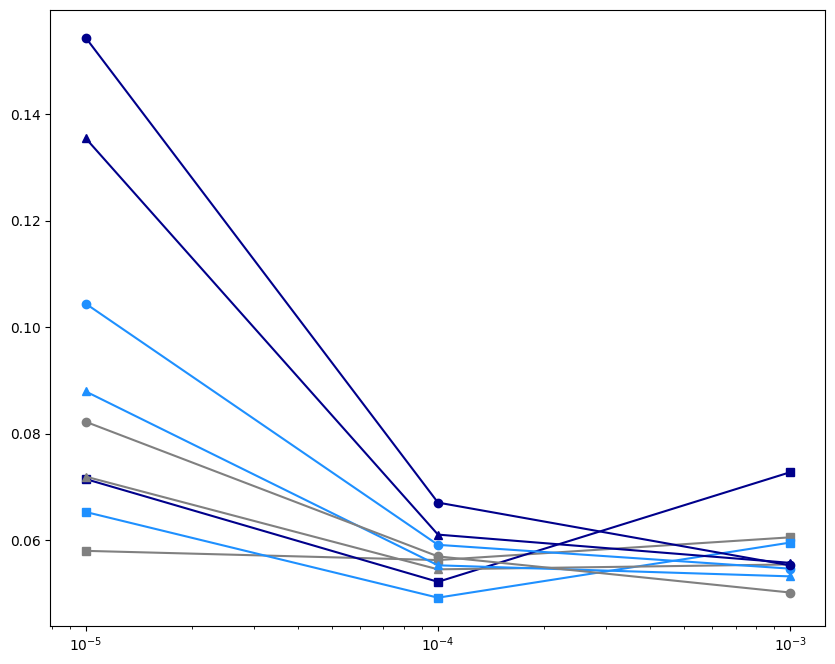

In [12]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.7: 'o', 1.1: '^', 10.5: 's'}
batch_sizes = [32, 64, 128]
model_sizes = [10.5, 1.1, 0.7]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for ms in model_sizes:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["Params[Mio.]"] == ms)]
        ax.plot(hpo_table_subset["learning_rate"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[ms])

ax.set_xscale("log")

